# 1 Importing and joining Dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
## for google colab
# df_f = pd.read_csv("/content/drive/MyDrive/Datasets/UNSW-NB15/NUSW-NB15_features.csv", encoding='cp1252')

## for local drive
df_f = pd.read_csv("./kaggle/input/NUSW-NB15_features.csv", encoding='cp1252')
pd.set_option('display.max_columns', None) #display all columns

In [3]:
df_f.drop(columns=df_f.columns[0], axis=1, inplace=True)

In [4]:
df_f

,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,Indicates to the state and its dependent proto...
6,dur,Float,Record total duration
7,sbytes,Integer,Source to destination transaction bytes
8,dbytes,Integer,Destination to source transaction bytes
9,sttl,Integer,Source to destination time to live value


In [5]:
df_f['Name'].unique()

array(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label'],
      dtype=object)

In [6]:
features = df_f['Name'].tolist()

In [7]:
df1 = pd.read_csv("./kaggle/input/UNSW-NB15_1.csv", names=features)
df2 = pd.read_csv("./kaggle/input/UNSW-NB15_2.csv", names=features)
df3 = pd.read_csv("./kaggle/input/UNSW-NB15_3.csv", names=features)
df4 = pd.read_csv("./kaggle/input/UNSW-NB15_4.csv", names=features)

C:\Users\hhi20\AppData\Local\Temp\ipykernel_12764\2756057312.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("./kaggle/input/UNSW-NB15_1.csv", names=features)
C:\Users\hhi20\AppData\Local\Temp\ipykernel_12764\2756057312.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./kaggle/input/UNSW-NB15_2.csv", names=features)


In [8]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(700001, 49)
(700001, 49)
(700001, 49)
(440044, 49)


In [9]:
df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_all

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.937500,621800.937500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.085940,50480.171880,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.531300,636282.375000,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.562500,542597.187500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.250000,609067.562500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0


In [10]:
df_all.to_csv("UNSWNB15.csv", index=False)

# 2 Preprocessing

## 2.1 Cleansing Data

In [10]:
# dropping unneccassary columns
df_all.drop({'srcip', 'sport', 'dstip', 'dsport'}, axis=1, inplace=True)

In [11]:
# drop stime and ltime since we have duration
# df_all.drop({'Stime', 'Ltime'}, axis=1, inplace=True)

In [12]:
df_all.shape

(2540047, 45)

In [13]:
df_all['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [14]:
df_all = df_all.replace(r'^\s*$', np.nan, regex=True)

df_all['attack_cat'] = df_all['attack_cat'].str.strip(' ')
df_all['attack_cat'] = df_all['attack_cat'].str.replace('Backdoors', 'Backdoor')
df_all['attack_cat'] = df_all['attack_cat'].fillna('normal')

df_all['ct_ftp_cmd'] = df_all['ct_ftp_cmd'].astype('float64')

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 45 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Stime             int64  
 25  Ltime             int64  
 26  Sintpkt       

In [16]:
df_all['attack_cat'].nunique()

10

In [17]:
df_all['attack_cat'].value_counts()

attack_cat
normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64

In [18]:
df_all['Label'].value_counts()

Label
0    2218764
1     321283
Name: count, dtype: int64

In [19]:
print('attack_cat: ', df_all['attack_cat'].isna().sum())
print('number of 0 label: ', df_all['Label'][df_all.Label == 0].count())

#number of null values = to number of normal label then null value in attack_cat means no attack

attack_cat:  0
number of 0 label:  2218764


In [20]:
# both column "ct_flw_http_mthd", "is_ftp_login" and "ct_ftp_cmd" have Null Values (replace, drop or ignore)!!!!!!!!!!

# df_all['ct_flw_http_mthd'].isnull().value_counts()

df_all.columns[df_all.isna().any()].tolist()


['ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd']

In [21]:
print('ct_flw_http_mthd: ', df_all['ct_flw_http_mthd'].isna().sum())
print('is_ftp_login: ', df_all['is_ftp_login'].isna().sum())
print('ct_ftp_cmd: ', df_all['ct_ftp_cmd'].isna().sum())

ct_flw_http_mthd:  1348145
is_ftp_login:  1429879
ct_ftp_cmd:  1429879


In [22]:
# drop all rows with Null values
df_all = df_all.dropna(how='any',axis=0)

In [23]:
df_all['attack_cat'].value_counts()

attack_cat
normal            1064988
Generic              7522
Exploits             5409
Fuzzers              5051
Reconnaissance       1759
DoS                  1167
Backdoor              534
Analysis              526
Shellcode             223
Worms                  24
Name: count, dtype: int64

## 2.2 Label Encoding

In [24]:
categorical_features = ['proto', 'state', 'service', 'attack_cat']
category_dfs = {}

for feature in categorical_features:
    categories = df_all[feature].unique()
    category_mapping = {category: i for i, category in enumerate(categories)}
    df_all[feature] = df_all[feature].map(category_mapping)
    category_df = pd.DataFrame({'Category': categories, f'{feature}_code': range(len(categories))})
    category_dfs[feature] = category_df

df_proto = category_dfs['proto']
df_state = category_dfs['state']
df_service = category_dfs['service']
df_attack_cat = category_dfs['attack_cat']

del category_df, category_dfs

In [25]:
df_proto

,Category,proto_code
0,udp,0
1,arp,1
2,tcp,2
3,ospf,3
4,icmp,4
...,...,...
130,pipe,130
131,iplt,131
132,unas,132
133,fc,133


In [26]:
df_all

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,0,0,0.001055,132,164,31,29,0,0,0,5.004739e+05,6.218009e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,3,7,1,3,1,1,1,0,0
1,0,0,0.036133,528,304,31,29,0,0,1,8.767609e+04,5.048017e+04,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,2,4,2,3,1,1,2,0,0
2,0,0,0.001119,146,178,31,29,0,0,0,5.218945e+05,6.362824e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,12,8,1,2,2,1,1,0,0
3,0,0,0.001209,132,164,31,29,0,0,0,4.367246e+05,5.425972e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,6,9,1,1,1,1,1,0,0
4,0,0,0.001169,146,178,31,29,0,0,0,4.995722e+05,6.090676e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,7,9,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087198,2,0,0.308446,31366,2566,31,29,15,6,3,7.941747e+05,6.434838e+04,42,30,255,255,42932937,44002642,747,86,0,0,714.631067,25.183766,1421972723,1421972724,7.504049,10.615586,0.000724,0.000590,0.000134,0,0,0.0,0.0,0.0,1,1,2,1,1,1,1,0,0
1087199,2,2,0.006390,2054,2478,31,29,6,6,1,2.455086e+06,2.973396e+06,22,24,255,255,2248312090,103257044,93,103,0,0,18.467615,14.483103,1421972724,1421972724,0.298850,0.247174,0.000840,0.000701,0.000139,0,0,0.0,0.0,0.0,2,4,1,3,1,1,1,0,0
1087200,2,2,0.222470,8928,320,31,29,4,1,4,2.981436e+05,9.601295e+03,14,6,255,255,1950416979,108279257,638,53,0,0,1578.162777,67.547828,1421972724,1421972724,17.113078,44.367000,0.000579,0.000467,0.000112,0,0,0.0,0.0,0.0,3,3,2,3,1,1,2,0,0
1087201,2,0,0.004158,890,8896,31,29,2,4,2,1.498798e+06,1.540548e+07,8,10,255,255,222930142,224542400,111,890,1,3924,37.976649,21.801424,1421972724,1421972724,0.594000,0.381778,0.000719,0.000557,0.000162,0,0,1.0,0.0,0.0,1,1,2,2,1,1,2,0,0


In [27]:
# !pip install imbalanced-learn

In [28]:
# map numeric labels to corresponding categories
df_all['Label'] = df_all['Label'].map({0: 'normal', 1: 'anomaly'})

In [29]:
df_all['Label'].value_counts()

Label
normal     1064988
anomaly      22215
Name: count, dtype: int64

c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hhi20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


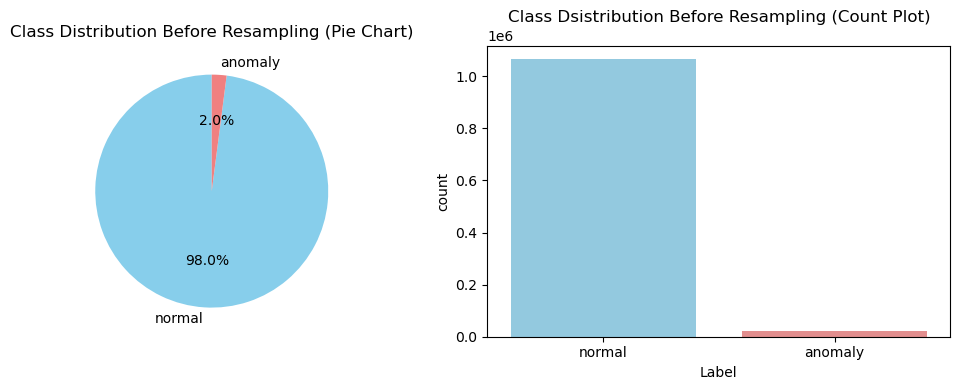

In [30]:
# set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# pie chart for class distribution
pie_colors = ['skyblue', 'lightcoral']
axes[0].pie(df_all['Label'].value_counts(), labels=df_all['Label'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
axes[0].set_title('Class Distribution Before Resampling (Pie Chart)')

# Count plot for class distribution
countplot_colors = sns.color_palette(pie_colors)
sns.countplot(x='Label', data=df_all, palette= countplot_colors, ax=axes[1])
axes[1].set_title('Class Dsistribution Before Resampling (Count Plot)')

# Adjust layout
plt.tight_layout()
plt.show()

## Splitting dataset

In [31]:
# split the dataset into features (X) and Label (Y)
X = df_all.drop(['attack_cat','Label'], axis=1)
Y = df_all['attack_cat']

In [32]:
# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

# 3 Resampling

In [33]:
# function to plot the class distribution after resampling
def plot_resampling_results(Y_resampled, title):
  plt.figure(figsize=(4, 4))
  pd.Series(Y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
  plt.title(title)
  plt.show()

## 3.1 Random Undersampling (RUS)

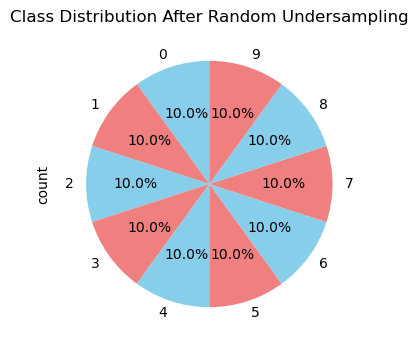

In [34]:
rus = RandomUnderSampler(random_state=101) # pass the parameter sampling_strategy = "RATIO" (sampling_strategy=0.7) for sampling other than 50/50 -> minority/majority
X_rus, Y_rus = rus.fit_resample(X_train, Y_train)
plot_resampling_results(Y_rus, 'Class Distribution After Random Undersampling')

In [35]:
# Label column Before Undersampling
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [36]:
# Label column After Undersampling
Y_rus.value_counts()

attack_cat
0    20
1    20
2    20
3    20
4    20
5    20
6    20
7    20
8    20
9    20
Name: count, dtype: int64

In [37]:
print('No. of records discarded: ', Y_train.shape[0] - Y_rus.shape[0])

No. of records discarded:  869562


## 3.2 Random Oversampling (ROS)

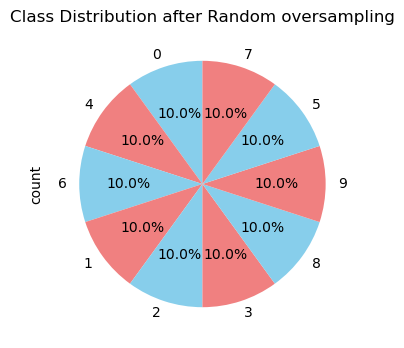

In [38]:
ros = RandomOverSampler(random_state=111)
X_ros, Y_ros = ros.fit_resample(X_train, Y_train)
plot_resampling_results(Y_ros, 'Class Distribution after Random oversampling')

In [39]:
Y_train.value_counts()

attack_cat
0    852031
4      6008
1      4330
6      4007
2      1413
3       925
9       427
8       422
5       179
7        20
Name: count, dtype: int64

In [40]:
Y_ros.value_counts()

attack_cat
0    852031
4    852031
6    852031
1    852031
2    852031
3    852031
8    852031
9    852031
5    852031
7    852031
Name: count, dtype: int64

In [41]:
print("No. of records added: ", Y_ros.shape[0] - Y_train.shape[0])

No. of records added:  7650548


In [42]:
X_ros.duplicated().value_counts()

True     7696746
False     823564
Name: count, dtype: int64